In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline
import seaborn as sns

# **DOMAIN: Semiconductor manufacturing process**
**• CONTEXT:**
A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of
signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a
specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise.
Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then
feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key
factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to
learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and
trying out different combinations of features, essential signals that are impacting the yield type can be identified.

**• DATA DESCRIPTION:** signal-data.csv : (1567, 592)
The data consists of 1567 datapoints each with 591 features.
The dataset presented in this case represents a selection of such features where each example represents a single production entity with
associated measured features and the labels represent a simple pass/fail yield for in house line testing.**Target column “ –1” corresponds to
a pass and “1” corresponds to a fail**  and the data time stamp is for that specific test point.

**• PROJECT OBJECTIVE:** We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.

In [ ]:
#Read the ‘signal-data.csv’ file
df = pd.read_csv("/content/drive/MyDrive/AIML/AIML/FMT/Final Project/signal-data.csv")
print(df)

                     Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6       7       8  ...       581     582     583     58

In [ ]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 592 columns):
 #    Column     Dtype  
---   ------     -----  
 0    Time       object 
 1    0          float64
 2    1          float64
 3    2          float64
 4    3          float64
 5    4          float64
 6    5          float64
 7    6          float64
 8    7          float64
 9    8          float64
 10   9          float64
 11   10         float64
 12   11         float64
 13   12         float64
 14   13         float64
 15   14         float64
 16   15         float64
 17   16         float64
 18   17         float64
 19   18         float64
 20   19         float64
 21   20         float64
 22   21         float64
 23   22         float64
 24   23         float64
 25   24         float64
 26   25         float64
 27   26         float64
 28   27         float64
 29   28         float64
 30   29         float64
 31   30         float64
 32   31         float64
 33   32         

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


*   The differnce in values from 3rd Quartile and max value is greater which shows there is high skewness towards the max value or right skewed.The data is not normally distributed and the data has more outliers towards the right tails, which requiers heavy outlier treatment.
*   The Feature '5' has a constant value '100' for all the records which is not providing any information in the analysis of the dataset or patterns
*   The feature '4' exhibits a abnormal devaition in maximum value(outlier).
*   Most of the features exhibits,the value of max that significantly surpasses Q3 by more than a standard deviation deviation is a strong candidate for an outlier.

# **Data cleansing:**

In [ ]:
#for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature
from os import sched_get_priority_max
def handle_missing_values(df):


  # Calculate null value percentages
  null_values = df.isnull().sum() / len(df)


  #  remove all the features with 20%+ Null values
  df = df.loc[:, null_values < 0.2]

  # Separate numeric and categorical features
  numeric_cols = df.select_dtypes(include=['int64', 'float64'])
  categorical_cols = df.select_dtypes(include='object')

  # Impute missing values in numeric features with mean
  for col in numeric_cols:
      if df[col].isnull().any():
          df.loc[:, col] = df[col].fillna(df[col].mean())  # Efficient in-place modification

  # Impute missing values in categorical features with mode
  for col in categorical_cols:
      if df[col].isnull().any():
          df.loc[:, col] = df[col].fillna(df[col].mode()[0])  # Efficient in-place modification

  return df


df = handle_missing_values(df.copy())


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 560 entries, Time to Pass/Fail
dtypes: float64(558), int64(1), object(1)
memory usage: 6.7+ MB
None


In [ ]:
# Check for any missing values after imputing with mean
has_missing_values = df.isna().any().any()  # Double `.any()` for overall check

if has_missing_values:
    print("There are missing values in the DataFrame.")
else:
    print("No missing values found.")

No missing values found.


In [ ]:
#Identify and drop the features which are having same value for all the rows

def drop_constant_columns(df):
  '''
  Drops columns from a DataFrame that have the same value in all rows and prints the dropped column names.'''

  # Identify constant columns (using nunique)
  constants = df.nunique() == 1

  if constants.any():
    # Find actual constant column names
    constant_names = df.columns[constants]

    # Drop constant columns
    df = df.drop(columns=constant_names)

    # Print the constant column names
    print("Dropped constant columns (same value in all rows):", list(constant_names))
    n_dropped_rows = len(constant_names)
    print("No of Feature dropped :", (n_dropped_rows))
    #print("DataFrame after dropping constant columns:")
    print(df.info())
  else:
    print("No constant columns found in the DataFrame.")

  return df


# Check for and drop constant columns
df = drop_constant_columns(df.copy())  # Operate on a copy to avoid modifying the original



Dropped constant columns (same value in all rows): ['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']
No of Feature dropped : 116
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 444 entries, Time to Pass/Fail
dt

In [ ]:
#check if there are any duplicate rows and drop

def drop_and_count_duplicates(df):

  # Check for duplicates (using `any` method)
  duplicates = df.duplicated()

  if duplicates.any():
    print("Number of duplicate rows:", duplicates.sum())

    # Drop duplicate rows (inplace modification)
    df.drop_duplicates(inplace=True)
    print("Duplicate rows dropped successfully!")
  else:
    print("There are no duplicate rows in the DataFrame")

  return df

  # Check for and drop duplicates
sd = drop_and_count_duplicates(df.copy())  # Operate on a copy to avoid modifying the original

# Print the DataFrame after dropping duplicates
print(df.info())

There are no duplicate rows in the DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 444 entries, Time to Pass/Fail
dtypes: float64(442), int64(1), object(1)
memory usage: 5.3+ MB
None


In [ ]:
#drop the time feature
df=df.drop('Time', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 443 entries, 0 to Pass/Fail
dtypes: float64(442), int64(1)
memory usage: 5.3 MB


In [ ]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of a number.

df[~df.iloc[:, 1:].applymap(np.isreal).all(1)]

<ipython-input-33-2b010c65eeee>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[~df.iloc[:, 1:].applymap(np.isreal).all(1)]


,0,1,2,3,4,6,7,8,9,10,...,577,582,583,584,585,586,587,588,589,Pass/Fail


In [ ]:
df['Pass/Fail'].value_counts()

,count
Pass/Fail,
-1,1463
1,104


- Check for any duplicate rows in the dataset the duplicate rows are not going to help in find/predicting the patterns in datase.To reduce the complexity duplicate rows can be deleted.
- The 'Time' feature can be dropped as it is doesnt add much value to the dataset.

**Check for multi-collinearity in the data**

In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

                  0         1         2         3         4         6  \
0          1.000000 -0.143840  0.004756 -0.007613 -0.011014  0.002270   
1         -0.143840  1.000000  0.005767 -0.007568 -0.001636 -0.025564   
2          0.004756  0.005767  1.000000  0.298935  0.095891 -0.136225   
3         -0.007613 -0.007568  0.298935  1.000000 -0.058483 -0.685835   
4         -0.011014 -0.001636  0.095891 -0.058483  1.000000 -0.074368   
...             ...       ...       ...       ...       ...       ...   
586        0.018443 -0.009403 -0.025495  0.034711 -0.043929 -0.041209   
587       -0.025880  0.017266 -0.029345 -0.039132 -0.031005  0.034027   
588       -0.028166  0.010118 -0.030818 -0.033645 -0.026100  0.032227   
589        0.004174  0.044797 -0.032890 -0.080341  0.050910  0.043777   
Pass/Fail -0.025141 -0.002603 -0.000957 -0.024623 -0.013756  0.016239   

                  7         8         9        10  ...       577       582  \
0          0.031483 -0.052622  0.009045  0.00

In [ ]:
#Checks for multicollinearity in a DataFrame and drops highly correlated features.
def handle_multicollinearity(df, threshold=0.9):

  # Calculate correlation matrix
  corr_matrix = df.corr()

  # Identify highly correlated features (excluding diagonal and self-correlations)
  features_to_drop = set()
  for col in corr_matrix:
    for other_col in corr_matrix.columns[corr_matrix.columns.get_loc(col) + 1:]:  # Skip self-correlation
      corr = corr_matrix.loc[col, other_col]
      if abs(corr) > threshold and col != other_col:
        features_to_drop.add(other_col)

  if features_to_drop:
    # Drop features with high correlation
    df = df.drop(columns=list(features_to_drop))
    print("Dropped features due to multicollinearity with correlation > ", threshold, ":", list(features_to_drop))
    print("No of Columns dropped :", len(features_to_drop))
  else:
    print("No significant multicollinearity detected.")

  return df


# Check and handle multicollinearity (adjust threshold as needed)
df = handle_multicollinearity(df.copy())



Dropped features due to multicollinearity with correlation >  0.9 : ['440', '353', '101', '569', '174', '479', '338', '390', '407', '335', '406', '455', '70', '283', '387', '279', '445', '349', '274', '206', '332', '333', '539', '355', '294', '434', '522', '359', '417', '470', '491', '424', '342', '356', '552', '307', '252', '54', '366', '299', '347', '411', '323', '304', '282', '311', '388', '275', '297', '324', '520', '270', '437', '303', '331', '575', '494', '298', '413', '541', '36', '415', '343', '392', '154', '475', '289', '435', '354', '296', '301', '447', '271', '429', '443', '420', '344', '426', '469', '495', '561', '285', '277', '584', '389', '556', '305', '448', '300', '446', '350', '442', '281', '568', '291', '478', '428', '452', '427', '459', '341', '523', '50', '405', '306', '490', '360', '376', '525', '278', '386', '308', '363', '207', '453', '554', '272', '209', '123', '286', '334', '416', '309', '321', '337', '365', '477', '567', '362', '96', '106', '454', '290', '357'

In [ ]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 248 entries, 0 to Pass/Fail
dtypes: float64(247), int64(1)
memory usage: 3.0 MB
None


In [ ]:
# From the initial analysis, the dataset doesnt have a normal distribution ,the data is right skewed or has many outliers
#Calculate for the IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print("IQR")
print(IQR)

IQR
0             89.87500
1             85.86000
2             36.95555
3            506.28410
4              0.51190
               ...    
583            0.00490
586            0.01415
587            0.00970
589           70.38110
Pass/Fail      0.00000
Length: 248, dtype: float64


In [ ]:
#print the skewness in the data
df.skew()

,0
0,0.514641
1,-0.043163
2,-0.307136
3,1.719310
4,19.733442
...,...
583,24.417453
586,1.438483
587,1.948028
589,2.715340


In [ ]:
#Replaces outliers with median for all columns except the last one, based on IQR.
def replace_outliers_except_last(df, iqr_multiplier=1.5):

  # Exclude the last column
  cols_to_use = df.columns[:-1]

  # Check for Q1 and Q3 columns (optional)
  if 'Q1' not in df.columns or 'Q3' not in df.columns:

    return df.copy()  # Return a copy of the original DataFrame

  # Calculate IQR
  IQR = df[cols_to_use].quantile(0.75) - df[cols_to_use].quantile(0.25)

  # Lower and upper bounds for outliers
  lower_bound = Q1 - iqr_multiplier * IQR
  upper_bound = Q3 + iqr_multiplier * IQR

  # Replace outliers with median (excluding last column)
  df_replaced = df.copy()
  for col in cols_to_use:
    median_val = df[col].median()
    df_replaced.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_val

  return df_replaced

# Example usage (assuming df has Q1 and Q3 columns)
df_outlier_replaced = replace_outliers_except_last(df.copy())

# Print the modified DataFrame
df = df_outlier_replaced
print(df.head(5))


         0        1          2          3       4         6       7       8  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

        9      10  ...       570     571    572     573     582     583  \
0  0.0162 -0.0034  ...  533.8500  2.1113   8.95  0.3157  0.5005  0.0118   
1 -0.0005 -0.0148  ...  535.0164  2.4335   5.92  0.2653  0.5019  0.0223   
2  0.0041  0.0013  ...  535.0245  2.0293  11.21  0.1882  0.4958  0.0157   
3 -0.0124 -0.0033  ...  530.5682  2.0253   9.33  0.1738  0.4990  0.0103   
4 -0.0031 -0.0072  ...  532.0155  2.0275   8.83  0.2224  0.4800  0.4766   

        586       587         589  Pass/Fail  
0  0.021458  0.016475   99.

In [ ]:
df['Pass/Fail'].value_counts()

,count
Pass/Fail,
-1,1463
1,104


In [ ]:
#check for null values after replacing NaN with median
null_counts = sd.isnull().sum()

# Print informative message
if null_counts.any():
    print("Columns with null values and their counts:")
    for col, count in null_counts.items():
      if count > 0:
        print(f"- {col}: {count}")  # Use f-strings for clear formatting
else:
    print("There are no null values in the DataFrame.")

There are no null values in the DataFrame.


In Data Cleansing :

*   Intially anlaysing the stastics of the dataset the dataset had many outliers or data was not normally distributed which required **outlier treatement**
*  The feature having **Null values > 20%** were dropped from the dataset
*  The features having same values in all the rows were dropped as the duplicate values are not going to help in the data analysis
*  The **time feature** was removed which does'nt provide much meaning or data for the analysis
*   The multicollinarity between the feature was analysed and the features having **>0.90 threshold was dropped**
*   As seen from the 5 point summary analysis the data has outliers which was replaced with the median values to get a balanced dataset

# **Data analysis & visualisation:**

In [ ]:
df.head(5)

,0,1,2,3,4,6,7,8,9,10,...,570,571,572,573,582,583,586,587,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,...,533.8500,2.1113,8.95,0.3157,0.5005,0.0118,0.021458,0.016475,99.670066,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,535.0164,2.4335,5.92,0.2653,0.5019,0.0223,0.009600,0.020100,208.204500,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,...,535.0245,2.0293,11.21,0.1882,0.4958,0.0157,0.058400,0.048400,82.860200,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,530.5682,2.0253,9.33,0.1738,0.4990,0.0103,0.020200,0.014900,73.843200,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,532.0155,2.0275,8.83,0.2224,0.4800,0.4766,0.020200,0.014900,73.843200,-1


In [ ]:
df.describe()

,0,1,2,3,4,6,7,8,9,10,...,570,571,572,573,582,583,586,587,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,101.112908,0.121822,1.462862,-0.000841,0.000146,...,530.523623,2.101836,28.450165,0.345636,0.500096,0.015318,0.021458,0.016475,99.670066,-0.867262
std,73.480613,80.227793,29.380932,439.712852,56.103066,6.209271,0.008936,0.073849,0.015107,0.009296,...,17.499736,0.275112,86.304681,0.248478,0.003403,0.017174,0.012354,0.008805,93.861936,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.191000,-0.053400,-0.034900,...,317.196400,0.980200,3.540000,0.066700,0.477800,0.006000,-0.016900,0.003200,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,97.937800,0.121100,1.411250,-0.010800,-0.005600,...,530.702700,1.982900,7.500000,0.242250,0.497900,0.011600,0.013450,0.010600,44.368600,-1.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,101.492200,0.122400,1.461600,-0.001300,0.000400,...,532.398200,2.118600,8.650000,0.293400,0.500200,0.013800,0.020500,0.014800,72.023000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,104.530000,0.123800,1.516850,0.008400,0.005900,...,534.356400,2.290650,10.130000,0.366900,0.502350,0.016500,0.027600,0.020300,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.656400,0.074900,0.053000,...,589.508200,2.739500,454.560000,2.196700,0.509800,0.476600,0.102800,0.079900,737.304800,1.000000


In [ ]:
df.corr()

,0,1,2,3,4,6,7,8,9,10,...,570,571,572,573,582,583,586,587,589,Pass/Fail
0,1.000000,-0.143840,0.004756,-0.007613,-0.011014,0.002270,0.031483,-0.052622,0.009045,0.006504,...,-0.018953,-0.023166,0.013678,-0.002067,0.000224,0.023453,0.018443,-0.025880,0.004174,-0.025141
1,-0.143840,1.000000,0.005767,-0.007568,-0.001636,-0.025564,-0.012037,0.031258,0.023964,0.009645,...,-0.009000,-0.037932,0.001753,-0.011467,0.043556,0.002904,-0.009403,0.017266,0.044797,-0.002603
2,0.004756,0.005767,1.000000,0.298935,0.095891,-0.136225,-0.146213,0.023528,0.016168,0.069893,...,-0.037070,-0.015600,-0.000518,-0.030674,-0.006023,0.015697,-0.025495,-0.029345,-0.032890,-0.000957
3,-0.007613,-0.007568,0.298935,1.000000,-0.058483,-0.685835,0.073856,-0.102892,0.068215,0.049873,...,0.002231,-0.017820,0.007634,0.013163,0.008988,0.025436,0.034711,-0.039132,-0.080341,-0.024623
4,-0.011014,-0.001636,0.095891,-0.058483,1.000000,-0.074368,-0.347734,-0.025946,0.054206,-0.006470,...,0.005273,-0.081983,-0.012024,-0.016533,0.045081,-0.001300,-0.043929,-0.031005,0.050910,-0.013756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,0.023453,0.002904,0.015697,0.025436,-0.001300,-0.039398,0.010276,0.017390,-0.036036,0.039060,...,0.010110,0.006792,-0.017368,-0.022666,-0.190090,1.000000,0.002257,-0.002649,-0.003008,0.005981
586,0.018443,-0.009403,-0.025495,0.034711,-0.043929,-0.041209,0.058113,0.010433,0.033738,0.000327,...,0.020544,-0.056391,-0.008668,-0.013504,-0.016726,0.002257,1.000000,0.167913,-0.486559,0.004156
587,-0.025880,0.017266,-0.029345,-0.039132,-0.031005,0.034027,-0.021426,0.022845,0.059301,0.046965,...,0.008113,-0.010562,-0.001425,-0.018896,-0.024473,-0.002649,0.167913,1.000000,0.390813,0.035391
589,0.004174,0.044797,-0.032890,-0.080341,0.050910,0.043777,-0.107804,-0.022770,0.004880,0.008393,...,-0.010583,0.010952,-0.022672,-0.027153,0.041486,-0.003008,-0.486559,0.390813,1.000000,-0.002653


<Axes: xlabel='Pass/Fail'>

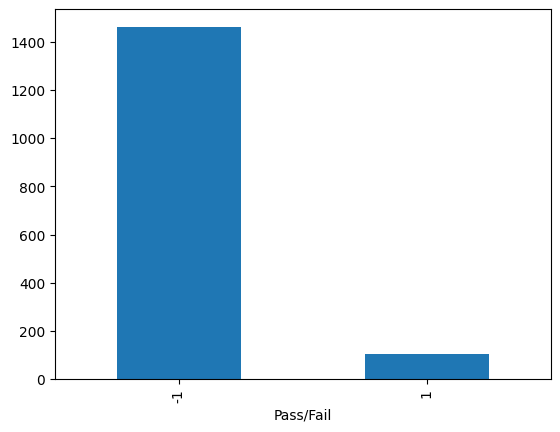

In [ ]:
df["Pass/Fail"].value_counts().plot(kind="bar")

Class Percentages:
	- -1: 93.36%
	- 1: 6.64%


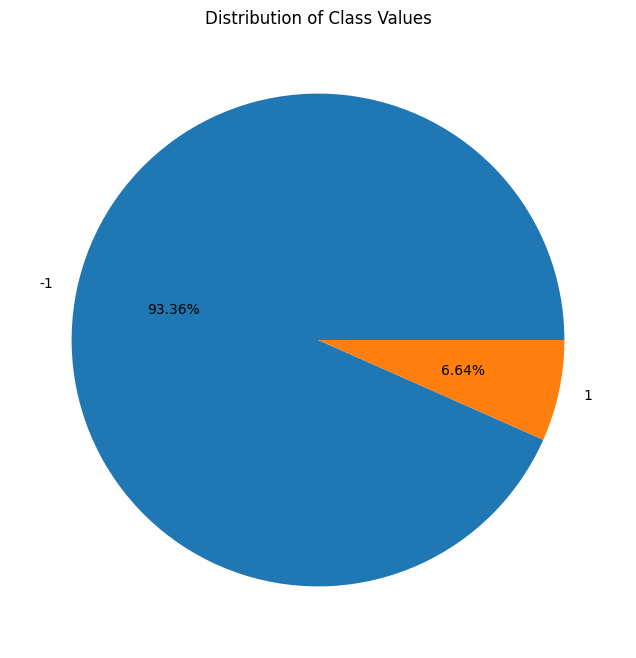

In [ ]:


# Assuming you have loaded your data into a DataFrame named 'df'

# Get the counts for each class value
class_counts = df['Pass/Fail'].value_counts().sort_values(ascending=False)

# Calculate percentages
total_entries = len(df)
class_percentages = (class_counts / total_entries) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as desired
plt.pie(class_percentages, labels=class_counts.index, autopct="%1.2f%%")  # Format percentage display
plt.title("Distribution of Class Values")

# Print class percentages
print("Class Percentages:")
for class_value, percentage in class_percentages.items():
    print(f"\t- {class_value}: {percentage:.2f}%")

plt.show()

- The distribution of the Pass/Fail shows the classes are not balacned ie the Fail(1) has very few data samples. The Pass(-1) class has 93.36% and Fail(1) has 6.64% data which shows the data **classes are not balanced**

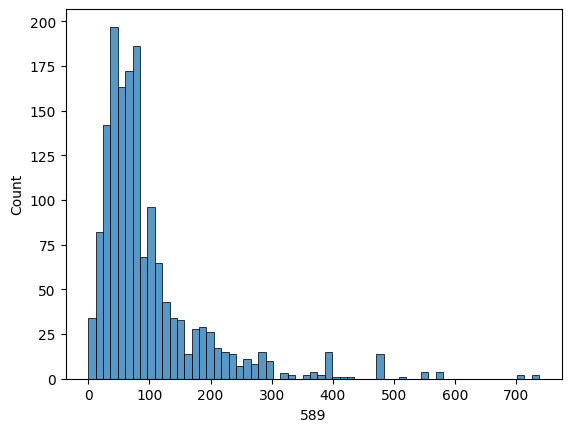

In [ ]:
sns.histplot(data=df,x= '589')
plt.show()

- For the feature **'589'** the max no of signals lie around the values **20 to 80.**The data is right skewed,higher the range of values the count is low

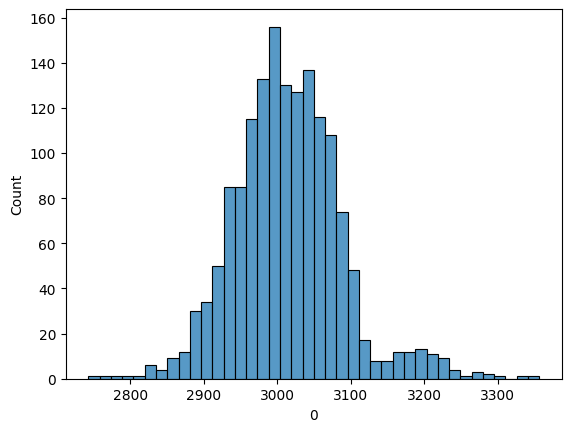

In [ ]:
sns.histplot(data=df,x='0')
plt.show()

- The Feature '0' looks like normally distributed,the maximum no values are distributed **around the mean values** ,the signals around 3000 has the maximum count

**Bivariate and multivariate analysis**

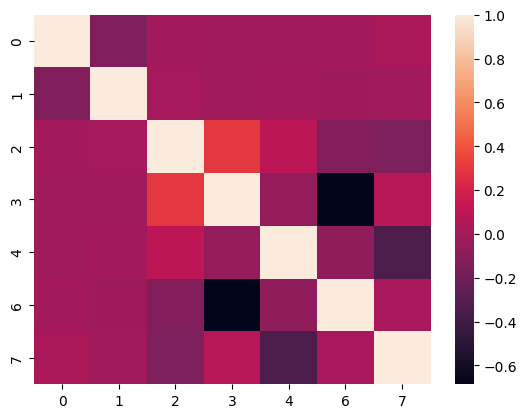

In [ ]:
# Assuming the first 8 features of the dataframe, the heatmap is displayed for understanding the correlation
df1 = df.iloc[:, 0:7]  # Select the first 8 columns (adjust as needed)

# Calculate the correlation matrix
corr_matrix = df1.corr()

# Create the heatmap
sns.heatmap(corr_matrix)
plt.show()

- Considering the first 8 signals from the dataset,the heatmap for these 8 signals shows the features 2 and 3 has a correlation of ~0.4.The other features has a poor correaltion.

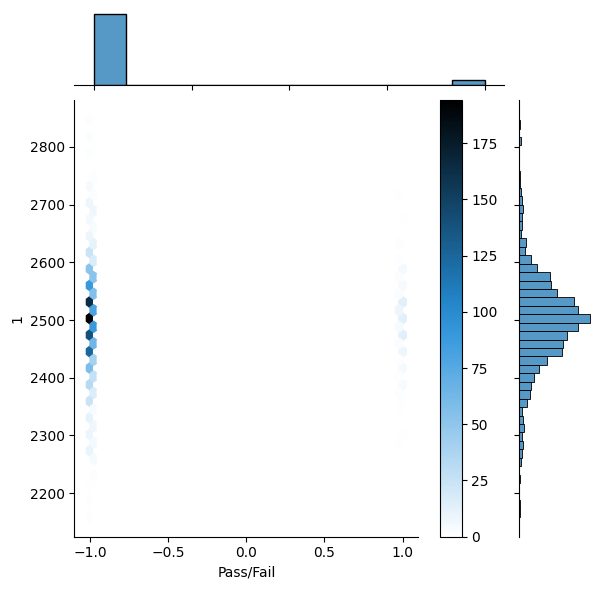

In [ ]:
sns.jointplot(data=df, x='Pass/Fail', y='1', kind='hex');
plt.colorbar();

- The above plot shows the multivariate analysis of the Pass/Fail and 1 Feature analysis.It is evident that the values are distributed around the mean and data is normally distributed. The feature shows a abnormal class didtribution in the Feature '1'.The data are distributed 2450 to 2550

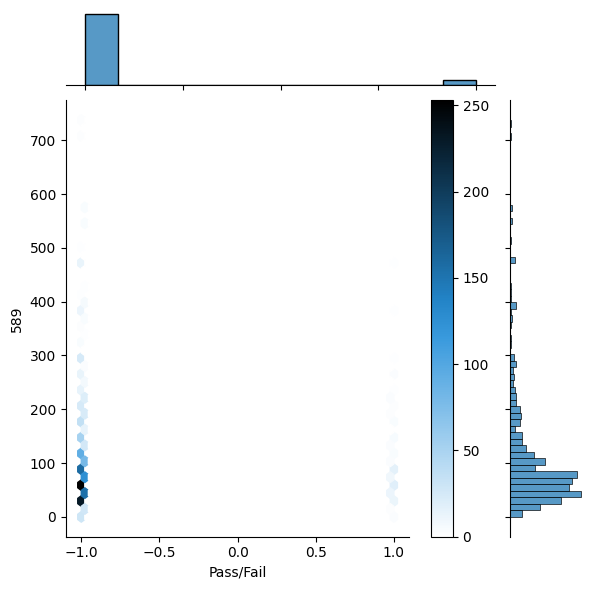

In [ ]:
sns.jointplot(data=df, x='Pass/Fail', y='589', kind='hex');
plt.colorbar();

- The data looks right skewed.Most of the data are distributed to the lower end.There is a heavy class imbalance in the data.There is a need for class balancing to make good predictions

# **Data pre-processing:**

In [ ]:
X = df.drop(['Pass/Fail'], axis=1)

y = df['Pass/Fail']

print(X.shape)
print(y.shape)


(1567, 247)
(1567,)


In [ ]:
y.value_counts()

,count
Pass/Fail,
-1,1463
1,104


- The data is highly imbalanced

In [ ]:
#implement the SMOTE technique to balance the data
from imblearn.over_sampling import SMOTE

print("Before UpSampling, counts of label '-1': {}".format(sum(y==-1)))
print("Before UpSampling, counts of label '1': {} \n".format(sum(y==1)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_res, y_res = sm.fit_resample(X, y.ravel())


print("After UpSampling, counts of label '-1': {}".format(sum(y_res==-1)))
print("After UpSampling, counts of label '1': {} \n".format(sum(y_res==1)))



print('After UpSampling, the shape of X: {}'.format(X_res.shape))
print('After UpSampling, the shape of y: {} \n'.format(y_res.shape))

Before UpSampling, counts of label '-1': 1463
Before UpSampling, counts of label '1': 104 

After UpSampling, counts of label '-1': 1463
After UpSampling, counts of label '1': 1463 

After UpSampling, the shape of X: (2926, 247)
After UpSampling, the shape of y: (2926,) 



<ipython-input-56-042a36a3d982>:8: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_res, y_res = sm.fit_resample(X, y.ravel())


In [ ]:
#scale and split the train & test data
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

# Split the standardized data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2340, 247)
(586, 247)
(2340,)
(586,)


**Check if the train and test data have similar statistical characteristics when compared with original data**

In [ ]:
X_scaled_series = pd.DataFrame(X_scaled)
print(X_scaled_series.describe())
y_res_series = pd.Series(y_res)
print(y_res_series.describe())


                0             1             2             3             4    \
count  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03  2.926000e+03   
mean   3.433723e-15  2.910408e-15 -7.081144e-15 -4.723191e-16  1.457025e-17   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -3.709532e+00 -4.661749e+00 -5.203108e+00 -3.716517e+00 -5.295383e-02   
25%   -6.495311e-01 -5.624882e-01 -6.873415e-01 -7.255768e-01 -4.308422e-02   
50%   -1.500031e-01  4.568973e-02 -4.361573e-02 -2.086613e-01 -3.748482e-02   
75%    5.491378e-01  5.457854e-01  6.125275e-01  5.094653e-01 -3.302207e-02   
max    4.846393e+00  4.872043e+00  4.299656e+00  6.280754e+00  2.706845e+01   

                5             6             7            8             9    \
count  2.926000e+03  2.926000e+03  2.926000e+03  2926.000000  2.926000e+03   
mean   1.627012e-15  1.908703e-15 -2.056834e-15     0.000000  2.428376e-18   
std    1.000171e+00  1.000171e+00  1.000171e+00     1.

In [ ]:
#print the 5-point summary for the test data Dependedent and independent variable
X_test_series = pd.DataFrame(X_test)
print(X_test_series.describe())
y_test_series = pd.Series(y_test)
print(y_test_series.describe())

              0           1           2           3           4           5    \
count  586.000000  586.000000  586.000000  586.000000  586.000000  586.000000   
mean    -0.071271    0.123342    0.006315    0.017223   -0.037268    0.007569   
std      0.917818    0.985441    0.972173    1.032859    0.009618    1.052566   
min     -2.682866   -4.260816   -5.203108   -1.803128   -0.051975   -3.576780   
25%     -0.664318   -0.463880   -0.667434   -0.712539   -0.043523   -0.453642   
50%     -0.182663    0.137102   -0.044347   -0.186885   -0.037481    0.005951   
75%      0.460977    0.690361    0.632018    0.514308   -0.033331    0.501833   
max      3.444542    4.872043    3.919075    6.280754    0.032646    5.286845   

              6           7           8           9    ...         237  \
count  586.000000  586.000000  586.000000  586.000000  ...  586.000000   
mean     0.015595    0.043810    0.027833    0.016148  ...    0.009448   
std      0.807148    1.029993    0.977536    1.0

In [ ]:
#print the 5-point summary for the test data Dependedent and independent variable
X_train_series = pd.DataFrame(X_train)
print(X_train_series.describe())
y_train_series = pd.Series(y_train)
print(y_train_series.describe())

               0            1            2            3            4    \
count  2340.000000  2340.000000  2340.000000  2340.000000  2340.000000   
mean      0.017848    -0.030888    -0.001581    -0.004313     0.009333   
std       1.019158     1.001658     1.007258     0.991996     1.118259   
min      -3.709532    -4.661749    -5.203108    -3.716517    -0.052954   
25%      -0.643624    -0.590169    -0.689521    -0.727931    -0.042961   
50%      -0.135330     0.030799    -0.043084    -0.211024    -0.037485   
75%       0.576865     0.517898     0.587974     0.507152    -0.032916   
max       4.846393     4.775275     4.299656     6.024294    27.068449   

               5            6            7            8            9    ...  \
count  2340.000000  2340.000000  2340.000000  2340.000000  2340.000000  ...   
mean     -0.001896    -0.003905    -0.010971    -0.006970    -0.004044  ...   
std       0.986839     1.043046     0.992485     1.005844     0.995773  ...   
min      -3.59857

# **Model training, testing and tuning:**

In [ ]:
#lets train the model using the Support Vector Machine

from sklearn.svm import SVC
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report,r2_score
from sklearn import metrics

# Fit the model on train
model = SVC(C= .1, kernel='linear', gamma= 1)
model.fit(X_train, y_train)

#predict train data
y_predict_train = model.predict(X_train)


In [ ]:
print(f"Performance on Train Data using Support Vector Machine")
print(classification_report(y_train, y_predict_train))
print("")

Performance on Train Data using Support Vector Machine
              precision    recall  f1-score   support

          -1       1.00      0.93      0.96      1163
           1       0.93      1.00      0.96      1177

    accuracy                           0.96      2340
   macro avg       0.96      0.96      0.96      2340
weighted avg       0.96      0.96      0.96      2340




**Using cross validation techniques.**

In [ ]:
#implement k fold Crossvalidation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 7

kfold = KFold(n_splits = num_folds)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.93162393 0.93589744 0.8974359  0.94444444 0.91880342 0.93589744
 0.9017094  0.94017094 0.91452991 0.94444444]
Accuracy: 92.650% (1.642%)


In [ ]:
# prepare Leave One Out cross validation
from sklearn.model_selection import LeaveOneOut

loocv= LeaveOneOut()

results = cross_val_score(model,X_train, y_train, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 93.376% (24.870%)


# **Hyper-parameter tuning using Gridsearch(Support Vector Machine)**

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint

param_grid = {
  'C': [0.1, 1, 10, 100],  # Regularization parameter (inverse strength)
  'kernel': ['linear', 'rbf', 'poly'],  # Kernel function type
  'gamma': ['auto', 'scale', 0.1, 0.01]  # Kernel coefficient (for 'rbf' and 'poly')
}


# Set random_state for reproducibility (optional)
grid_search = GridSearchCV(model, param_grid = param_grid,
                           scoring='accuracy',  # Metric to optimize (e.g., accuracy, F1-score)
                           cv= 10,            # Cross-validation folds
                           )  # Optional for reproducibility

grid_search.fit(X_train, y_train)



GridSearchCV(cv=10, estimator=SVC(C=0.1, gamma=1, kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['auto', 'scale', 0.1, 0.01],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Model: {best_model}")


Best Hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Model: SVC(C=10, gamma=0.01)


In [ ]:

svc_best_model = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])

svc_best_model.fit(X_train, y_train)

y_train_pred_bestmodel = svc_best_model.predict(X_train)
y_test_pred_bestmodel = svc_best_model.predict(X_test)

In [ ]:
print(f"Performance on Train Data on SVM model using Gridsearch:")
print(classification_report(y_train, y_train_pred_bestmodel))
print(f"Performance on Test Data on SVM model using Gridsearch:")
print(classification_report(y_test, y_test_pred_bestmodel))

Performance on Train Data on SVM model using Gridsearch:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      1177

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340

Performance on Test Data on SVM model using Gridsearch:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       286

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



# **Pricipal Component Analysis and SVM**

In [ ]:
#we can try to balance the class imbalance using randeomoversampler technique
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_resample(X, y)

In [ ]:
scaler = StandardScaler()

# Standardize the features
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X_ros)

# Split the standardized data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_ros, y_ros, test_size=0.2, random_state=1)

print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(2340, 247)
(586, 247)
(2340,)
(586,)


In [ ]:
from sklearn.decomposition import PCA
n = 100
pca = PCA(n_components= n)
X_train_pca = pca.fit_transform(X_train1)
X_test_pca = pca.transform(X_test1)

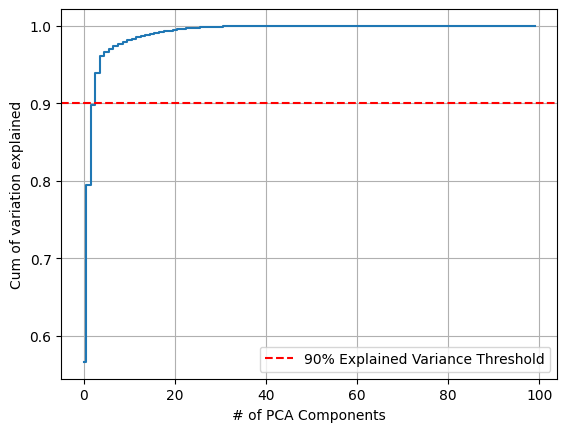

In [ ]:
plt.step(list(range(0,n)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('# of PCA Components')

# Add a horizontal line at 90% explained variance threshold
threshold = 0.90

#plot the horizontal line to highlight the threshold
plt.axhline(y = threshold, color='red', linestyle='--', label=f'{threshold*100:.0f}% Explained Variance Threshold')

# Add legend for clarity
plt.legend()

plt.grid(True)
plt.show()

In [ ]:
pca1 = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train1)
X_test_pca = pca.transform(X_test1)

In [ ]:
Xpca1_train = pca1.fit_transform(X_train1)
Xpca1_test = pca1.transform(X_test1)

In [ ]:
# Building a Support Vector Machine on train data
svc_model_pca = SVC(C=best_params['C'], kernel=best_params['kernel'], gamma=best_params['gamma'])
#svc_model_pca.fit(X_train_scaled, y_train)

svc_model_pca.fit(Xpca1_train,y_train1)
svc_model_pca.fit(Xpca1_test,y_test1)

prediction_train_pca = svc_model_pca.predict(Xpca1_train)
prediction_test_pca = svc_model_pca.predict(Xpca1_test)

In [ ]:
print("Classification Report on Train Data using SVM Model after PCA ")
print(classification_report(y_train1, prediction_train_pca))
print("Classification Report on Test Data using SVM Model after PCA ")
print(classification_report(y_test1, prediction_test_pca))

Classification Report on Train Data using SVM Model after PCA 
              precision    recall  f1-score   support

          -1       0.91      1.00      0.95      1163
           1       1.00      0.91      0.95      1177

    accuracy                           0.95      2340
   macro avg       0.96      0.95      0.95      2340
weighted avg       0.96      0.95      0.95      2340

Classification Report on Test Data using SVM Model after PCA 
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       286

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586



**Classification report**

In [ ]:
print(f"Performance on Train Data on Support Vector Machine using SMOTE technique")
print(classification_report(y_train, y_predict_train))
print("")
print(f"Performance on Train Data on SVM model using GridsearchCV:")
print(classification_report(y_train, y_train_pred_bestmodel))
print("")
print("Classification Report on Train Data using SVM Model after PCA ")
print(classification_report(y_train1, prediction_train_pca))
print("Classification Report on Test Data using SVM Model after PCA ")
print(classification_report(y_test1, prediction_test_pca))

Performance on Train Data on Support Vector Machine using SMOTE technique
              precision    recall  f1-score   support

          -1       1.00      0.93      0.96      1163
           1       0.93      1.00      0.96      1177

    accuracy                           0.96      2340
   macro avg       0.96      0.96      0.96      2340
weighted avg       0.96      0.96      0.96      2340


Performance on Train Data on SVM model using GridsearchCV:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      1177

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340


Classification Report on Train Data using SVM Model after PCA 
              precision    recall  f1-score   support

          -1       0.91      1.00      0.95      1163
           1       1.00      0.91      


*   **SVM with SMOTE** - The performance metrics (precision, recall, F1-score) are all very high for both classes (-1 and 1), indicating good classification accuracy. The overall accuracy is also 0.96, suggesting the model performs well on the training data.

*   **SVM after Hyperparamter Tuning** - The performance metrics are all perfect (1.00) for both classes, and the overall accuracy is 1.00. This might seem ideal, but it's important to be cautious of such high accuracy on the training data.

*   **SVM Model after PCA** - The performance metrics here are also very high for both classes (precision, recall, F1-score all around 0.98) with an overall accuracy of 0.98.
*   The SVM with GridSearchCV achieving perfect accuracy (1.00) might be a case of overfitting
*   These results suggest that the SVM model with PCA and random oversampling performs very well on both the training and test data. This is a promising outcome, indicating that the model has learned the underlying patterns effectively

# **Pipeline for Support Vector Machine Model with PCA and Standard scalar**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [ ]:
#Build a pipeline for Support Vector Machine Model with PCA and Standard scalar
pipe_svc = Pipeline([('scl', StandardScaler()), ('pca', PCA()), ('svc', SVC())])


param_grid_svc = {'pca__n_components':[20,25],'svc__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__kernel':['rbf','poly']}

grid_svc = GridSearchCV( pipe_svc , param_grid = param_grid_svc, cv = 10)

grid_svc.fit( X_train, y_train)

train_predict_svm_svc = grid_svc.predict(X_train)
test_predict_svm_svc = grid_svc.predict(X_test)

print(" Best cross-validation accuracy: {:.2f}". format( grid_svc.best_score_))
print(" Best parameters: ", grid_svc.best_params_)

print(" Train set accuracy for SVM: {:.2f}". format( grid_svc.score( X_train, y_train)))
print(" Test set accuracy for SVM: {:.2f}". format( grid_svc.score( X_test, y_test)))


 Best cross-validation accuracy: 0.97
 Best parameters:  {'pca__n_components': 20, 'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
 Train set accuracy for SVM: 1.00
 Test set accuracy for SVM: 0.96


In [ ]:
print("Classification Report on Train Data using SVM Model:")
print(classification_report(y_train, train_predict_svm_svc))
print("Classification Report on Test Data using SVM Model:")
print(classification_report(y_test, test_predict_svm_svc))

Classification Report on Train Data using SVM Model:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      1177

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340

Classification Report on Test Data using SVM Model:
              precision    recall  f1-score   support

          -1       0.94      0.99      0.97       300
           1       0.99      0.94      0.96       286

    accuracy                           0.96       586
   macro avg       0.97      0.96      0.96       586
weighted avg       0.97      0.96      0.96       586



# **Pipeline for Logistic Regression Model with PCA and Standard scalar**

In [ ]:
#Build a pipeline for Logistic Regression Model with PCA and Standard scalar
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA()), ('LogisticRegression', LogisticRegression())])
param_grid_lr = {
    'pca__n_components': [20,25],  # Range of PCA components to try
    'LogisticRegression__C': [0.001, 0.01, 0.1, 1, 10, 100]  # Range of regularization strength for LogisticRegression
}

# Create GridSearchCV object
grid_search_lr = GridSearchCV(pipe_lr, param_grid = param_grid_lr, cv=10)

grid_search_lr.fit( X_train, y_train)

train_predict_svm_lr = grid_search_lr.predict(X_train)
test_predict_svm_lr = grid_search_lr.predict(X_test)

print(" Best cross-validation accuracy: {:.2f}". format( grid_search_lr.best_score_))
print(" Best parameters: ", grid_search_lr.best_params_)

print(" Train set accuracy for Logistic Regression: {:.2f}". format( grid_search_lr.score( X_train, y_train)))
print(" Test set accuracy for Logistic Regression: {:.2f}". format( grid_search_lr.score( X_test, y_test)))


 Best cross-validation accuracy: 0.72
 Best parameters:  {'LogisticRegression__C': 10, 'pca__n_components': 25}
 Train set accuracy for Logistic Regression: 0.71
 Test set accuracy for Logistic Regression: 0.71


In [ ]:
print("Classification Report on Train Data using Logistic Regression Model:")
print(classification_report(y_train, train_predict_svm_lr))
print("Classification Report on Test Data using Logistic Regression Model:")
print(classification_report(y_test, test_predict_svm_lr))

Classification Report on Train Data using Logistic Regression Model:
              precision    recall  f1-score   support

          -1       0.71      0.72      0.71      1163
           1       0.72      0.71      0.71      1177

    accuracy                           0.71      2340
   macro avg       0.71      0.71      0.71      2340
weighted avg       0.71      0.71      0.71      2340

Classification Report on Test Data using Logistic Regression Model:
              precision    recall  f1-score   support

          -1       0.71      0.73      0.72       300
           1       0.71      0.69      0.70       286

    accuracy                           0.71       586
   macro avg       0.71      0.71      0.71       586
weighted avg       0.71      0.71      0.71       586



# **Pipeline for KNN with PCA and Standard scalar**

In [ ]:
#Build a pipeline for KNN with PCA and Standard scalar
from sklearn.neighbors import KNeighborsClassifier


# Define the pipeline (no string in step name)
pipe_knn = Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA()), ('knn', KNeighborsClassifier())])

# Define the parameter grid for hyperparameter tuning
param_grid_knn = {
    'pca__n_components': [20, 25],  # Range of PCA components to try
    'knn__n_neighbors': [3, 5, 7, 9],  # Range of neighbors for KNN
    'knn__p': [1, 2]  # Choose between Manhattan (p=1) or Euclidean (p=2) distance
}

# Create GridSearchCV object
grid_search_knn = GridSearchCV(pipe_knn, param_grid=param_grid_knn, cv=10)

# Fit the model with grid search
grid_search_knn.fit(X_train, y_train)

train_predict_knn = grid_search_knn.predict(X_train)
test_predict_knn = grid_search_knn.predict(X_test)

# Evaluate model performance (e.g., mean squared error (MSE), R-squared)
print(" Best cross-validation accuracy: {:.2f}". format( grid_search_knn.best_score_))
print(" Best parameters: ", grid_search_knn.best_params_)
print(" Train set accuracy for KNeighborsClassifier: {:.2f}". format( grid_search_knn.score( X_train, y_train)))
print(" Test set accuracy for KNeighborsClassifier: {:.2f}". format( grid_search_knn.score( X_test, y_test)))

 Best cross-validation accuracy: 0.91
 Best parameters:  {'knn__n_neighbors': 3, 'knn__p': 2, 'pca__n_components': 25}
 Train set accuracy for KNeighborsClassifier: 0.96
 Test set accuracy for KNeighborsClassifier: 0.90


In [ ]:
print("Classification Report on Train Data using KNeighborsClassifier Model:")
print(classification_report(y_train, train_predict_knn))
print("Classification Report on Test Data using KNeighborsClassifier Model:")
print(classification_report(y_test, test_predict_knn))

Classification Report on Train Data using KNeighborsClassifier Model:
              precision    recall  f1-score   support

          -1       1.00      0.92      0.96      1163
           1       0.93      1.00      0.96      1177

    accuracy                           0.96      2340
   macro avg       0.96      0.96      0.96      2340
weighted avg       0.96      0.96      0.96      2340

Classification Report on Test Data using KNeighborsClassifier Model:
              precision    recall  f1-score   support

          -1       1.00      0.81      0.90       300
           1       0.84      1.00      0.91       286

    accuracy                           0.90       586
   macro avg       0.92      0.91      0.90       586
weighted avg       0.92      0.90      0.90       586



# **Pipeline for Randomforest Classifier with StandardScaler and PCA**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Define the pipeline


pipe_rf = Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA()), ('rfc', RandomForestClassifier())])

# Define the parameter grid for hyperparameter tuning (without bootstrap)
param_grid_rf = {
    'pca__n_components': [10, 20, 30],  # Range of PCA components to try
    'rfc__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'rfc__max_depth': [4, 6, 8]  # Maximum depth of each tree
}

# Create GridSearchCV object
grid_search_rf = GridSearchCV(pipe_rf, param_grid=param_grid_rf, cv=10)

# Fit the model with grid search
grid_search_rf.fit(X_train, y_train)

train_predict_rf = grid_search_rf.predict(X_train)
test_predict_rf = grid_search_rf.predict(X_test)

In [ ]:
# Evaluate model performance
print(" Best cross-validation accuracy: {:.2f}". format( grid_search_rf.best_score_))
print(" Best parameters: ", grid_search_rf.best_params_)
print(" Train set accuracy for RandomForestClassifier: {:.2f}". format( grid_search_rf.score( X_train, y_train)))
print(" Test set accuracy for RandomForestClassifier: {:.2f}". format( grid_search_rf.score( X_test, y_test)))

 Best cross-validation accuracy: 0.91
 Best parameters:  {'pca__n_components': 30, 'rfc__max_depth': 8, 'rfc__n_estimators': 300}
 Train set accuracy for RandomForestClassifier: 0.98
 Test set accuracy for RandomForestClassifier: 0.91


In [ ]:
print("Classification Report on Train Data using RandomForestClassifier Model:")
print(classification_report(y_train, train_predict_rf))
print("Classification Report on Test Data using RandomForestClassifier Model:")
print(classification_report(y_test, test_predict_rf))

Classification Report on Train Data using RandomForestClassifier Model:
              precision    recall  f1-score   support

          -1       0.98      0.99      0.98      1163
           1       0.99      0.98      0.98      1177

    accuracy                           0.98      2340
   macro avg       0.98      0.98      0.98      2340
weighted avg       0.98      0.98      0.98      2340

Classification Report on Test Data using RandomForestClassifier Model:
              precision    recall  f1-score   support

          -1       0.95      0.87      0.91       300
           1       0.88      0.95      0.91       286

    accuracy                           0.91       586
   macro avg       0.91      0.91      0.91       586
weighted avg       0.91      0.91      0.91       586



# **Post Training and Conclusion:**

In [ ]:
print("")
print("Classification Report on Train Data using SVM Model:")
print(classification_report(y_train, train_predict_svm_svc))
print("Classification Report on Test Data using SVM Model:")
print(classification_report(y_test, test_predict_svm_svc))
print("")
print("Classification Report on Train Data using Logistic Regression Model:")
print(classification_report(y_train, train_predict_svm_lr))
print("Classification Report on Test Data using Logistic Regression Model:")
print(classification_report(y_test, test_predict_svm_lr))
print("")
print("Classification Report on Train Data using KNeighborsClassifier Model:")
print(classification_report(y_train, train_predict_knn))
print("Classification Report on Test Data using KNeighborsClassifier Model:")
print(classification_report(y_test, test_predict_knn))
print("")
print("Classification Report on Train Data using RandomForestClassifier Model:")
print(classification_report(y_train, train_predict_rf))
print("Classification Report on Test Data using RandomForestClassifier Model:")
print(classification_report(y_test, test_predict_rf))


Classification Report on Train Data using SVM Model:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      1177

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340

Classification Report on Test Data using SVM Model:
              precision    recall  f1-score   support

          -1       0.94      0.99      0.97       300
           1       0.99      0.94      0.96       286

    accuracy                           0.96       586
   macro avg       0.97      0.96      0.96       586
weighted avg       0.97      0.96      0.96       586


Classification Report on Train Data using Logistic Regression Model:
              precision    recall  f1-score   support

          -1       0.71      0.72      0.71      1163
           1       0.72      0.71      0.71      1177

    ac

In [ ]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

# **ROC curve for Logistic Regression classifier**

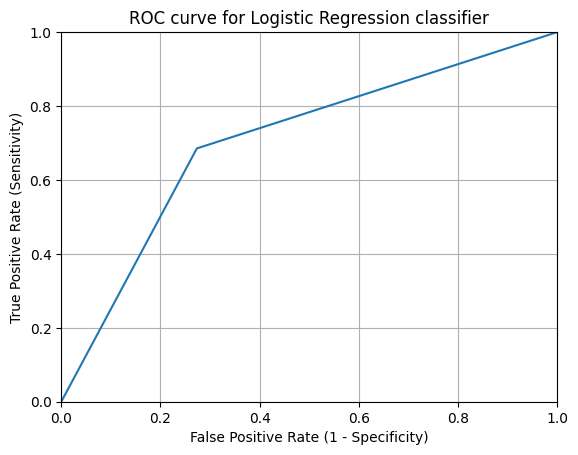

In [ ]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_predict_svm_lr)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic Regression classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
evaluate_threshold(0.7)

Sensitivity: 0.6853146853146853
Specificity: 0.7266666666666667


In [ ]:
print(metrics.roc_auc_score(y_test, test_predict_svm_lr))

0.705990675990676


# **ROC curve for SVC**

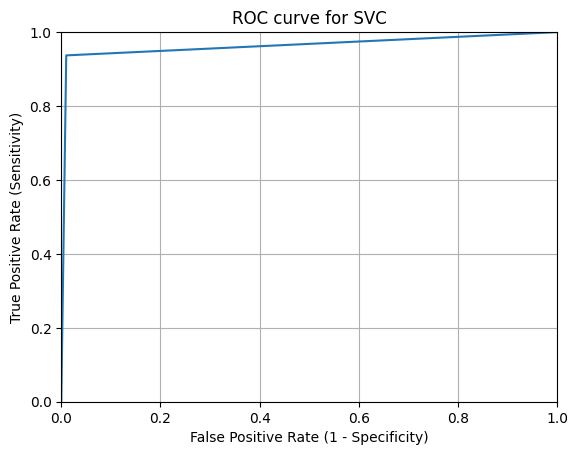

In [ ]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_predict_svm_svc)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for SVC')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
evaluate_threshold(0.90)

Sensitivity: 0.9370629370629371
Specificity: 0.99


In [ ]:
print(metrics.roc_auc_score(y_test, test_predict_svm_svc))

0.9635314685314685


# **ROC curve for KNN**

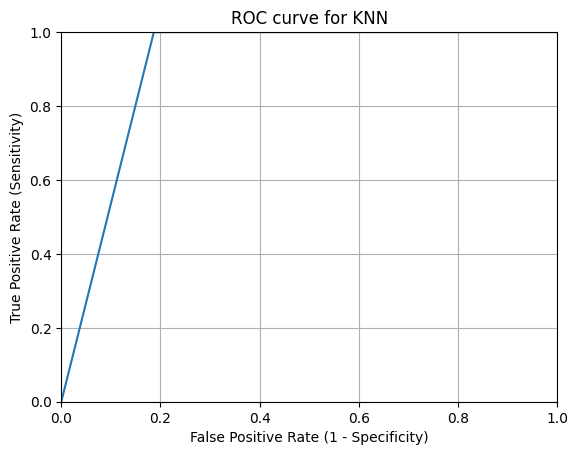

In [ ]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_predict_knn)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for KNN')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
evaluate_threshold(0.8)

Sensitivity: 1.0
Specificity: 0.8133333333333334


In [ ]:
print(metrics.roc_auc_score(y_test, test_predict_knn))

0.9066666666666667


# **ROC curve for Randomforest classifier**

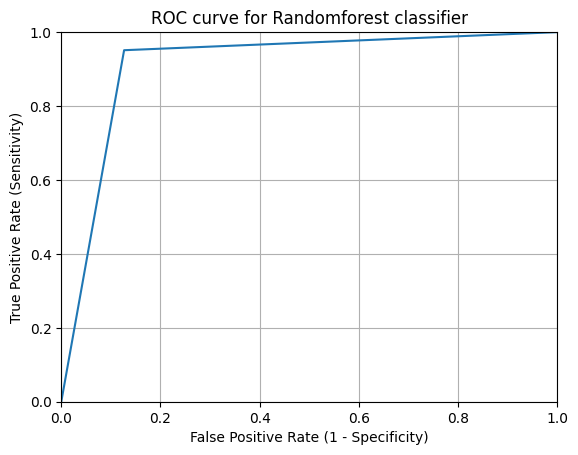

In [ ]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_predict_rf)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Randomforest classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
evaluate_threshold(0.90)

Sensitivity: 0.951048951048951
Specificity: 0.8733333333333333


In [ ]:
print(metrics.roc_auc_score(y_test, test_predict_rf))

0.9121911421911422


- The SVM Model delivers a **roc_auc_score of 96.3** which is the high compared to other models and as close to 1.So the best model is Support Vector Machine algorithm is considered to be the best performing model.

**C. Pickle the selected model for future use.**

In [ ]:
import pickle
fileobj = open('model_pickle', 'wb')
pickle.dump(pipe_svc,fileobj)
fileobj.close()

In [ ]:
import pickle
file = open('model_pickle', 'rb')
#[0p9o8i7uyt]

In [ ]:
model.score(X_test, y_test)

0.9266211604095563

## **Conclusion**

In [ ]:
print("Classification Report on Train Data using SVM Model:")
print(classification_report(y_train, train_predict_svm_svc))
print("Classification Report on Test Data using SVM Model:")
print(classification_report(y_test, test_predict_svm_svc))

Classification Report on Train Data using SVM Model:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1163
           1       1.00      1.00      1.00      1177

    accuracy                           1.00      2340
   macro avg       1.00      1.00      1.00      2340
weighted avg       1.00      1.00      1.00      2340

Classification Report on Test Data using SVM Model:
              precision    recall  f1-score   support

          -1       0.94      0.99      0.97       300
           1       0.99      0.94      0.96       286

    accuracy                           0.96       586
   macro avg       0.97      0.96      0.96       586
weighted avg       0.97      0.96      0.96       586



**Best Model - SVM :**

**Best cross-validation accuracy:** 0.97

**Best parameters:**  {'pca__n_components': 20, 'svc__C': 100, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

**Train set accuracy for SVM:** 1.00

**Test set accuracy for SVM:** 0.96

**Sensitivity:** 0.9405594405594405

**Specificity:** 0.9866666666666667


- The **SVM model** achieved perfect classification metrics (precision, recall, F1-score = 1.00) on the training data, indicating excellent model fitting.

- On the test data, the model achieved **96% accuracy** with balanced performance for both classes (Pass and Fail), showing strong generalization.

- Sensitivity (recall for Fail class) was 0.94, and specificity (recall for Pass class) was 0.99, demonstrating the model’s effectiveness in identifying both passing and failing entities accurately.

- The drop in accuracy on test data shows that model is overfit.Applying regularization techniques(L1 & L2 Regularization) during model training will prevent overfitting.